In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

In [2]:
path = "C:\\Users\\Rifat\\Desktop\\TF\\Data\\RAT AND BEAVER"
CATEGORIES = ['RAT', 'BEAVER']

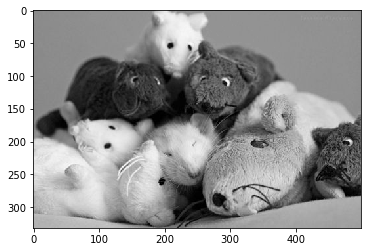

In [3]:
for cat in CATEGORIES:
    path = os.path.join(path, cat)
    for file in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, file), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap='gray')
        plt.show()
        break
    break

In [4]:
print(img_array.shape)

(332, 500)


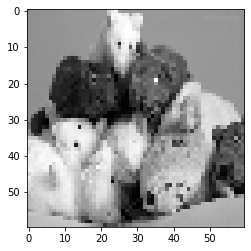

In [5]:
IMG_SIZE = 60

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [6]:
DIR = "C:\\Users\\Rifat\\Desktop\\TF\\Data\\RAT AND BEAVER"
CATEGORIES = ['RAT', 'BEAVER']

In [7]:
training_data = []


def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DIR, category)
        class_num = CATEGORIES.index(category)
        for file in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, file), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass


create_training_data()

In [8]:
print(len(training_data))

1218


In [13]:
import random

random.shuffle(training_data)

In [14]:
for sample in training_data[:20]:
    print(sample[1])

1
1
0
0
0
0
1
1
0
1
0
1
0
0
0
1
1
0
1
1


In [15]:
X = []
y = []

In [16]:
for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,1)
y = np.array(y)

In [17]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("Y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [18]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)